# Isotropic smoothing of image via Heat equation

## import library

In [234]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
from skimage import color
from skimage import io

## load input image
- filename for the input image is 'barbara_color.jpeg'

In [235]:
 
I0 = io.imread('barbara_color.jpeg')

## check the size of the input image

In [236]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

num_row     = I0.shape[0]
num_column  = I0.shape[1]
num_channel = I0.ndim
#

# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  512
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a grey image

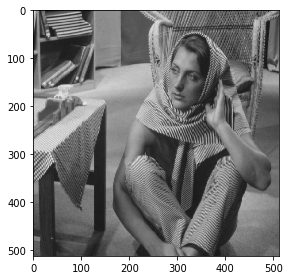

number of rows of I =  512
number of columns of I =  512


In [237]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = color.rgb2gray(I0)

io.imshow(I) 
io.show()

num_row     = I.shape[0]
num_column  = I.shape[1]
#

# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)

## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [238]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = (I - np.min(I)) * ((1-0) / (np.max(I) - np.min(I))) + 0
#

# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  1.0
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

In [239]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    Ix = I[:, 0 : I.shape[1]]
    Ixplus1 = np.append(I[:,1 : I.shape[1]], I[:, I.shape[1]-2 : I.shape[1]-1], axis = 1)
    D1 = Ixplus1 - Ix
    A = np.zeros((I.shape[1], 0), dtype=np.int64)
    D = np.concatenate((D1,A), axis = 1)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D


u[:, (plate_length-1):, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
u[:, :, (plate_length-1):] = u_right

- backward difference : $ I[x, y] - I[x-1, y] $ 

In [240]:
def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    Ix = I[:, 0 : I.shape[1]]
    Ixminus1 = np.roll(np.append(I[:, 0:I.shape[1]-1], I[:, 0:1], axis = 1), 1, axis = 1) 
    D1 = Ix - Ixminus1
    A = np.zeros((I.shape[0], 0), dtype=np.int64)
    D = np.roll(np.concatenate((D1,A), axis = 1), 1, axis = 1)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [241]:
def compute_derivative_y_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    Iy = I[0:I.shape[0] , :]
    Iyplus1 = np.append(I[1 : I.shape[0], :], I[I.shape[0]-2 : I.shape[1]-1, :], axis = 0)
    D1 = Iyplus1 - Iy  
    A = np.zeros((0, I.shape[0]), dtype=np.int64)
    D = np.concatenate((D1,A), axis = 0)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [242]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    Iy = I[0:I.shape[0], :]
    Iyminus1 = np.roll(np.append(I[0:I.shape[0]-1 ,:], I[0:1 ,:], axis = 0), 1, axis = 0) 
    D1 = Iy - Iyminus1
    A = np.zeros((0, I.shape[0]), dtype=np.int64)
    D = np.roll(np.concatenate((D1,A), axis = 0), 1, axis = 0)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D


## define a function to compute the laplacian of input matrix
- $\Delta I = \nabla^2 I = \frac{\partial^2 I}{\partial x^2} + \frac{\partial^2 I}{\partial y^2}$
- $\Delta I = I[x+1, y] + I[x-1, y] + I[x, y+1] + I[x, y-1] - 4 * I[x, y]$
- $\Delta I$ = derivative_x_forward - derivative_x_backward + derivative_y_forward - derivative_y_backward

In [243]:
def compute_laplace(I):
    
    laplace = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    laplace = compute_derivative_x_forward(I) - compute_derivative_x_backward(I) + compute_derivative_y_forward(I) - compute_derivative_y_backward(I)  
        
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return laplace

## define a function to compute the heat equation of data $I$ with a time step
- $I = I + \delta t * \Delta I$

In [244]:
def heat_equation(I, time_step):
    
    I_update = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    delta_t = 0.25
    I_update = I + delta_t * compute_laplace(I)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return I_update

## run the heat equation over iterations

In [245]:
def run_heat_equation(I, time_step, number_iteration):

    I_update = np.zeros(I.shape)

    for t in range(number_iteration):
        # ++++++++++++++++++++++++++++++++++++++++++++++++++
        # complete the blanks
        #
        
        delta_t = 0.25
        h = 1
        laplace_u = (compute_derivative_x_forward(I) - compute_derivative_x_backward(I) + compute_derivative_y_forward(I) - compute_derivative_y_backward(I)) / h
        I_update = I + delta_t * laplace_u 
    
        #
        # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return I_update

delta_t           = 0.25
h                 = 1
number_iteration  = 100
u                 = f

for t in range(number_iteration):

   u_x_forward    = compute_derivative(data = u, direction = x, scheme = forward, boundary_condition = neumann)
   u_x_backward   = compute_derivative(data = u, direction = x, scheme = backward, boundary_condition = neumann)
   u_y_forward    = compute_derivative(data = u, direction = y, scheme = forward, boundary_condition = neumann)
   u_y_backward   = compute_derivative(data = u, direction = y, scheme = backward, boundary_condition = neumann)

   laplace_u      = (u_x_forward - u_x_backward + u_y_forward - u_y_backward) / h
   u              = u + delta_t * laplace_u 


___

___

## functions for presenting the results

___

___

In [246]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [247]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [248]:
def function_result_03():

    L = compute_laplace(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(L, cmap='gray')
    plt.show()

In [249]:
def function_result_04():

    time_step   = 0.25
    I_update    = heat_equation(I, time_step)
    
    plt.figure(figsize=(8,6))
    plt.imshow(I_update, vmin=0, vmax=1, cmap='gray')
    plt.show()

In [250]:
def function_result_05():

    time_step           = 0.25
    number_iteration    = 128

    I_update = run_heat_equation(I, time_step, number_iteration)
    
    plt.figure(figsize=(8,6))
    plt.imshow(I_update, vmin=0, vmax=1, cmap='gray')
    plt.show()

In [251]:
def function_result_06():

    time_step           = 0.25
    number_iteration    = 512

    I_update = run_heat_equation(I, time_step, number_iteration)
    
    plt.figure(figsize=(8,6))
    plt.imshow(I_update, vmin=0, vmax=1, cmap='gray')
    plt.show()

In [252]:
def function_result_07():

    L = compute_laplace(I)

    value1 = L[0, 0]    
    value2 = L[-1, -1]    
    value3 = L[100, 100]    
    value4 = L[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

In [253]:
def function_result_08():

    time_step   = 0.25
    I_update    = heat_equation(I, time_step)

    value1 = I_update[0, 0]    
    value2 = I_update[-1, -1]    
    value3 = I_update[100, 100]    
    value4 = I_update[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

In [254]:
def function_result_09():

    time_step           = 0.25
    number_iteration    = 128

    I_update = run_heat_equation(I, time_step, number_iteration)

    value1 = I_update[0, 0]    
    value2 = I_update[-1, -1]    
    value3 = I_update[100, 100]    
    value4 = I_update[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

In [255]:
def function_result_10():

    time_step           = 0.25
    number_iteration    = 512

    I_update = run_heat_equation(I, time_step, number_iteration)

    value1 = I_update[0, 0]    
    value2 = I_update[-1, -1]    
    value3 = I_update[100, 100]    
    value4 = I_update[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


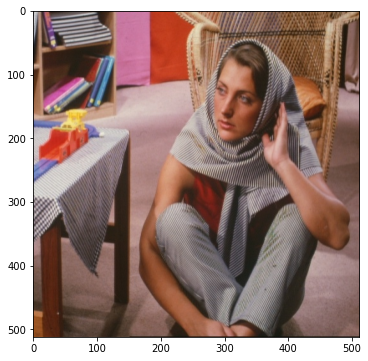

**************************************************
## [RESULT 02]
**************************************************


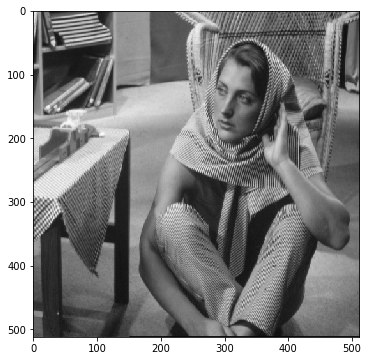

**************************************************
## [RESULT 03]
**************************************************


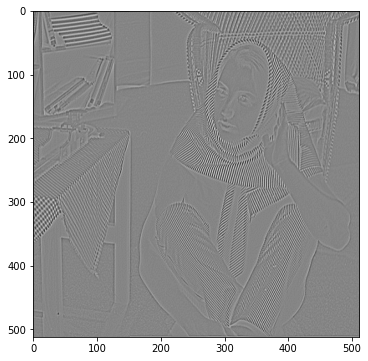

**************************************************
## [RESULT 04]
**************************************************


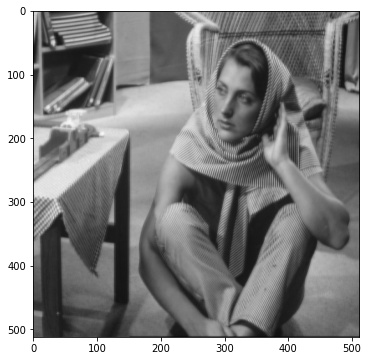

**************************************************
## [RESULT 05]
**************************************************


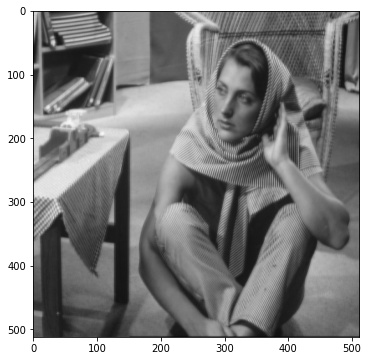

**************************************************
## [RESULT 06]
**************************************************


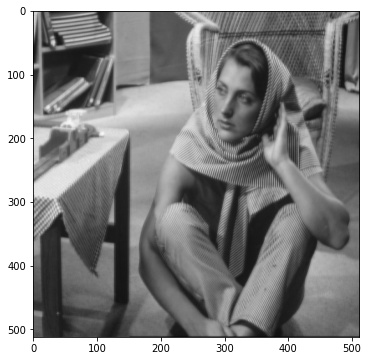

**************************************************
## [RESULT 07]
**************************************************
value1 =  0.4261547128050169
value2 =  0.3674257103577348
value3 =  -0.328848942803379
value4 =  -0.008878223183437672
**************************************************
## [RESULT 08]
**************************************************
value1 =  0.12555450052670059
value2 =  0.1617564543572766
value3 =  0.4573409144481098
value4 =  0.6052986123781076
**************************************************
## [RESULT 09]
**************************************************
value1 =  0.12555450052670059
value2 =  0.1617564543572766
value3 =  0.4573409144481098
value4 =  0.6052986123781076
**************************************************
## [RESULT 10]
**************************************************
value1 =  0.12555450052670059
value2 =  0.1617564543572766
value3 =  0.4573409144481098
value4 =  0.6052986123781076


In [256]:
number_result = 10

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)